# Chapter 01: Basic of PySpark

## What is Spark, anyway?
Spark is a platform for cluster computing. Spark allows spread data and computations over clusters with multiple nodes (think of each node as a separate computer). Splitting up data makes it easier to work with very large datasets because each node only works with a small amount of data.

As each node works on its own subset of the total data, it also carries out a part of the total calculations required, so that both data processing and computation are performed in parallel over the nodes in the cluster. It is a fact that parallel computation can make certain types of programming tasks much faster.
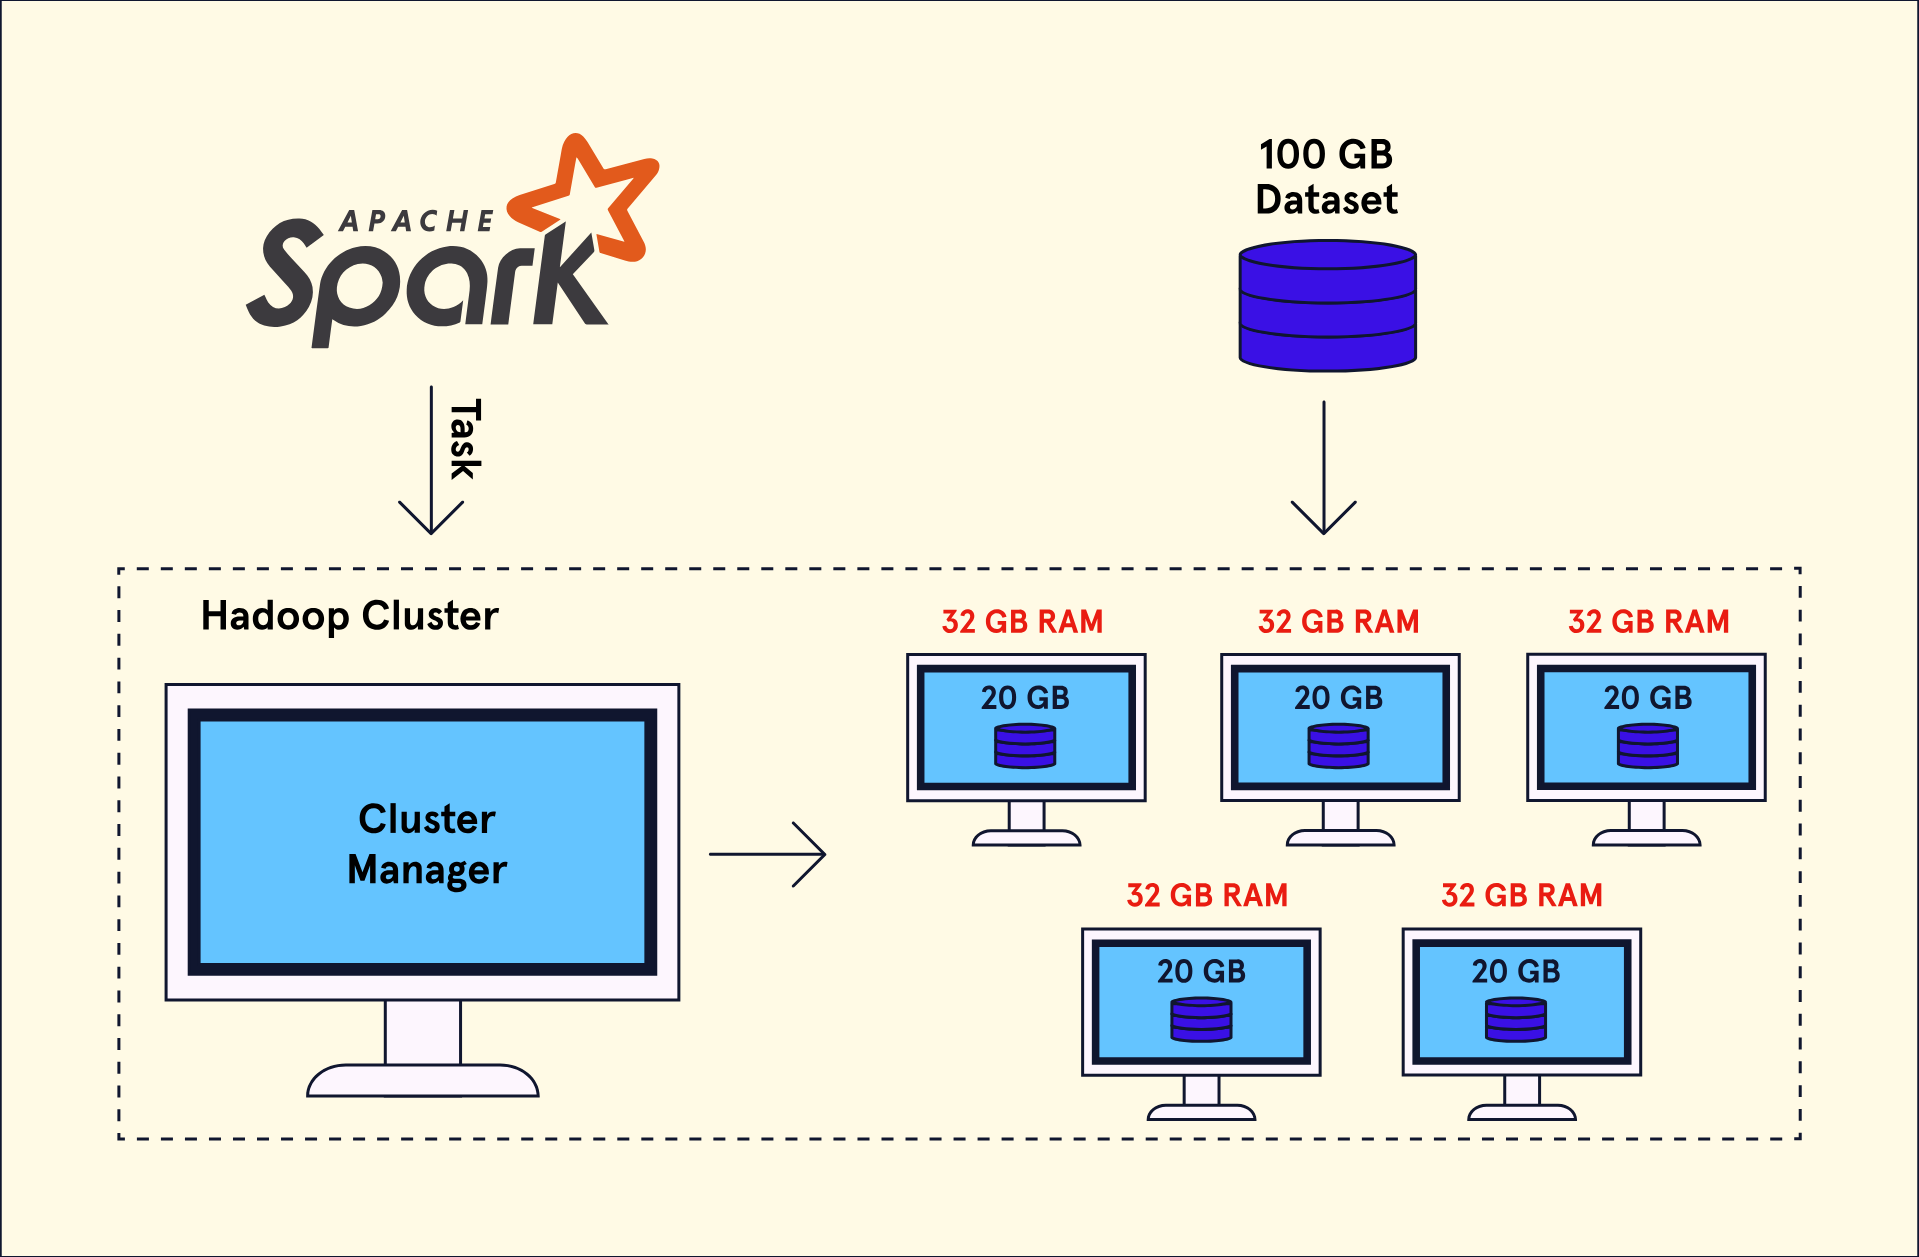
Spark can perform various tasks such as batch processing, real-time stream processing, iterative algorithms, interactive queries, and machine learning. Spark's core abstraction is the resilient distributed dataset (RDD), which allows distributed processing of large datasets across clusters of computers. It also provides higher-level APIs such as DataFrames and Datasets, which offer a more structured and efficient way to work with structured data.

One of the key advantages of Spark is its in-memory processing capabilities, which enable it to perform operations much faster than traditional disk-based systems like Hadoop MapReduce. Spark can run on top of various cluster managers, including Apache Hadoop YARN, Apache Mesos, and Kubernetes, making it highly versatile and compatible with existing big data ecosystems.

However, with greater computing power comes greater complexity.

Deciding whether or not Spark is the best solution for your problem takes some experience, but you can consider questions like:



*   Is my data too big to work with on a single machine?
*   Can my calculations be easily parallelized?

## How Spark Works
The Spark driver is the entry point of a Spark application and is used to create a Spark session. The driver program communicates with the cluster manager to create resilient distributed datasets (RDDs). To create an RDD, the data is divided up and distributed across worker nodes in a cluster. Copies of the RDD across the nodes ensure that RDDs are fault-tolerant, so information is recoverable in the event of a failure. Two types of operations can be performed on RDDs:

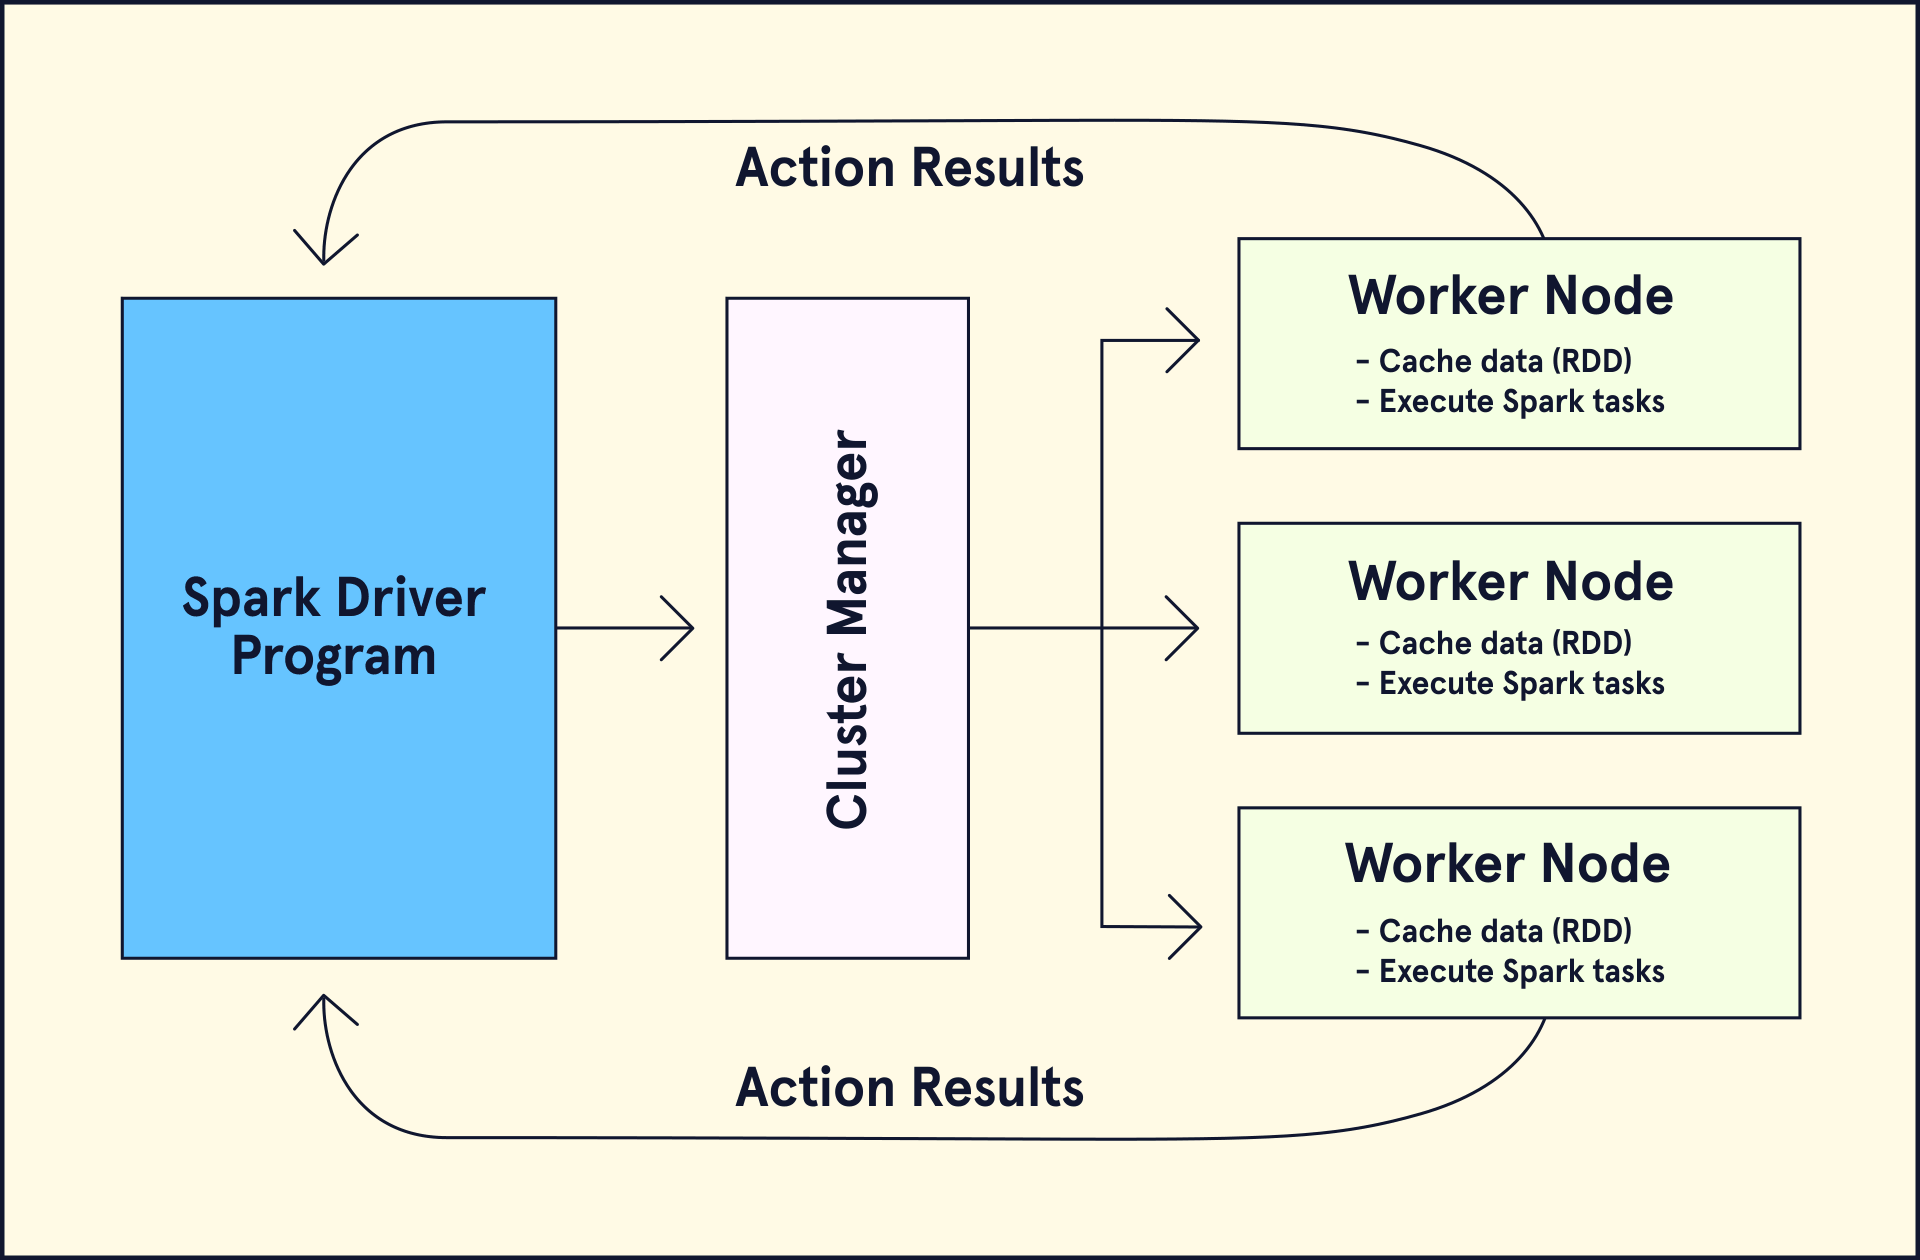

*   **Transformations** manipulate RDDs on the cluster.
*   **Actions** return a computation back to the main driver program.







## Using Spark in Python
The first step in using Spark is connecting to a cluster. In practice, the cluster will be hosted on a remote machine that's connected to all other nodes. There will be one computer, called the master that manages splitting up the data and the computations. The master is connected to the rest of the computers in the cluster, which are called worker. The master sends the workers data and calculations to run, and they send their results back to the master.

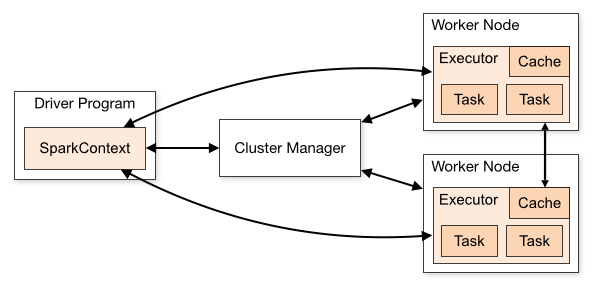

When just getting started with Spark it's simpler to run a cluster locally.

Creating the connection is as simple as creating an instance of the `SparkContext` class. The class constructor takes a few optional arguments that allow to specify the attributes of the cluster connecting to.

An object holding all these attributes can be created with the `SparkConf()` constructor. Take a look at the [documentation](https://colab.research.google.com/drive/1mHHmsi02hyZI-DXbB-9U2dBO8o4oybFu#scrollTo=RG3TNudeOuF5&line=10&uniqifier=1) for all the details!

In Apache Spark, `SparkContext` is the main entry point for interacting with the Spark cluster. It represents the connection to a Spark cluster, and through it, you can create RDDs (Resilient Distributed Datasets), broadcast variables, and accumulators, and perform various operations on distributed datasets.

Here are some key points about `SparkContext`:

1. **Initialization**: `SparkContext` needs to be initialized before interacting with any Spark functionality in your application. Typically, it's created as part of the application's initialization process.

2. **Cluster Connection**: `SparkContext` connects your application to the Spark cluster. It coordinates with the cluster manager to allocate resources and schedule tasks.

3. **Parallel Operations**: `SparkContext` enables parallel operations on distributed datasets. It provides methods to create RDDs from external datasets, perform transformations (such as map, filter, reduce), and perform actions (such as count, collect, save).

4. **Job Submission**: When you perform an action on an RDD, such as `collect()` or `saveAsTextFile()`, SparkContext is responsible for translating your code into a directed acyclic graph (DAG) of stages and submitting it to the cluster for execution.

Here's a basic example of initializing `SparkContext` in a Python application:

```python
from pyspark import SparkContext

# Create SparkContext
sc = SparkContext("local", "MyApp")

# Now you can perform operations on Spark RDDs
# For example:
data = [1, 2, 3, 4, 5]
rdd = sc.parallelize(data)
```

In the above example, `SparkContext` is initialized with the master URL `"local"`, indicating that it's running in local mode. In a real distributed environment, you would specify the master URL to connect to the cluster manager (e.g., `"spark://hostname:port"` for standalone mode or the appropriate URL for other cluster managers).

In [76]:
!pip install pyspark

In [78]:
# Here's a basic example of initializing `SparkContext` in a Python application

from pyspark import SparkContext

# Create SparkContext
sc = SparkContext("local", "MyApp")

# Now you can perform operations on Spark RDDs
# For example:
data = [1, 2, 3, 4, 5]
rdd = sc.parallelize(data)

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=MyApp, master=local) created by __init__ at <ipython-input-2-b0bdc163aef5>:6 

In [79]:
# Verify SparkContext
print(sc)

<SparkContext master=local appName=MyApp>


In [80]:
# Print Spark version
print(sc.version)

3.5.1


##Using DataFrames
<p>Spark's core data structure is the Resilient Distributed Dataset (RDD). This is a low level object that lets Spark work its magic by splitting data across multiple nodes in the cluster. However, RDDs are hard to work with directly, so we will use the Spark DataFrame abstraction built on top of RDDs.</p>
<p>The Spark DataFrame was designed to behave a lot like a SQL table (a table with variables in the columns and observations in the rows). Not only are they easier to understand, DataFrames are also more optimized for complicated operations than RDDs.</p>
<p>When start modifying and combining columns and rows of data, there are many ways to arrive at the same result, but some often take much longer than others. When using RDDs, it's up to the data scientist to figure out the right way to optimize the query, but the DataFrame implementation has much of this optimization built in!</p>
<p>To start working with Spark DataFrames, first have to create a <code>SparkSession</code> object from <code>SparkContext</code>. You can think of the <code>SparkContext</code> as your connection to the cluster and the <code>SparkSession</code> as your interface with that connection.</p>

##Creating a SparkSession

<p>It's best practice to use the <code>SparkSession.builder.getOrCreate()</code> method. This returns an existing <code>SparkSession</code> if there's already one in the environment, or creates a new one if necessary</p>

In [81]:
# Import SparkSession from pyspark.sql
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder \
    .master("local")\
    .appName("exercise_app") \
    .getOrCreate()

# Print spark
print(spark)

##  Download example data

In [82]:
import requests
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# URL of the file to download
file_url = 'https://drive.google.com/uc?id=1YLo060ccO-JNBJ7Cn_DT_y0LTkps-0Lg'

# Destination file path in Google Drive
destination_path = '/content/example_data_file.csv'

# Download the file
response = requests.get(file_url)

# Write the downloaded content to the destination file
with open(destination_path, 'wb') as f:
    f.write(response.content)

print('File downloaded successfully to Google Drive:', destination_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File downloaded successfully to Google Drive: /content/example_data_file.csv


In [83]:
# Define the URLs of the datasets and their corresponding names
urls = [
    ("https://assets.datacamp.com/production/repositories/1237/datasets/6e5c4ac2a4799338ba7e13d54ce1fa918da644ba/airports.csv", "airports.csv"),
    ("https://assets.datacamp.com/production/repositories/1237/datasets/fa47bb54e83abd422831cbd4f441bd30fd18bd15/flights_small.csv", "flights_small.csv"),
    ("https://assets.datacamp.com/production/repositories/1237/datasets/231480a2696c55fde829ce76d936596123f12c0c/planes.csv", "planes.csv")
]

# Destination folder in Google Drive
destination_folder = '/content/'

# Download each dataset and save it to Google Drive
for url, filename in urls:
    # Download the file content
    response = requests.get(url)

    # Write the content to the destination file in Google Drive
    with open(destination_folder + filename, 'wb') as f:
        f.write(response.content)

    print(f"File '{filename}' downloaded successfully to Google Drive.")

print("All files downloaded successfully to Google Drive.")

File 'airports.csv' downloaded successfully to Google Drive.
File 'flights_small.csv' downloaded successfully to Google Drive.
File 'planes.csv' downloaded successfully to Google Drive.
All files downloaded successfully to Google Drive.


## Read the data from the data source to the DataFrame

In [84]:
# Read data from CSV file into a DataFrame
df_climate_data = spark.read.csv("/content/example_data_file.csv", header=True, inferSchema=True)
df_airports_data = spark.read.csv("/content/airports.csv", header=True, inferSchema=True)
df_flights_data = spark.read.csv("/content/flights_small.csv", header=True, inferSchema=True)
df_planes_data = spark.read.csv("/content/planes.csv", header=True, inferSchema=True)

# Register the DataFrame as a temporary table
df_climate_data.createOrReplaceTempView("climate")
df_airports_data.createOrReplaceTempView("airports")
df_flights_data.createOrReplaceTempView("flights")
df_planes_data.createOrReplaceTempView("planes")

##Viewing tables
<p>Once you've created a <code>SparkSession</code>, you can start poking around to see what data is in your cluster!</p>
<p>Your <code>SparkSession</code> has an attribute called <code>catalog</code> which lists all the data inside the cluster. This attribute has a few methods for extracting different pieces of information.</p>
<p>One of the most useful is the <code>.listTables()</code> method, which returns the names of all the tables in your cluster as a list.</p></div></div></div>

In [85]:
# Print the tables in the catalog
print(spark.catalog.listTables())

[Table(name='airports', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True), Table(name='climate', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True), Table(name='flights', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True), Table(name='planes', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True), Table(name='temp', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]


## Running SQL Queries on Spark DataFrames
<p>One of the primary advantages of utilizing the DataFrame interface in Spark is the capability to execute SQL queries directly on the data stored within the Spark cluster. This feature enables users to harness the expressiveness and efficiency of SQL for data analysis and manipulation tasks.</p>
<p>In our Spark cluster, we have a variety of tables containing valuable data. For instance, let's consider the <code>'flights'</code> table, which encapsulates information about flights departing from Portland International Airport (PDX) or Seattle-Tacoma International Airport (SEA) during the years 2014 and 2015. To execute a SQL query on this table, we'll utilize the <code>.sql()</code> method provided by the <code>SparkSession</code> object. This method accepts a SQL query string as input and returns a DataFrame containing the query results.</p>
<p>Executing a SQL query on the <code>'flights'</code> table is straightforward. We simply invoke the <code>.sql()</code> method on our <code>SparkSession</code> object (<code>spark</code>), passing the SQL query string as an argument. It's important to note that the table name (<code>'flights'</code> in this case) is referenced directly within the SQL query, without being explicitly passed as an argument to any method. This is because the DataFrame API seamlessly integrates with SQL, eliminating the need for local objects to hold the data.</p>

In [106]:
df_flights_data.printSchema()

root
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- dep_time: string (nullable = true)
 |-- dep_delay: string (nullable = true)
 |-- arr_time: string (nullable = true)
 |-- arr_delay: string (nullable = true)
 |-- carrier: string (nullable = true)
 |-- tailnum: string (nullable = true)
 |-- flight: integer (nullable = true)
 |-- origin: string (nullable = true)
 |-- dest: string (nullable = true)
 |-- air_time: string (nullable = true)
 |-- distance: integer (nullable = true)
 |-- hour: string (nullable = true)
 |-- minute: string (nullable = true)



In [87]:
# define query
query = "FROM flights SELECT * LIMIT 10"

# Get the first 10 rows of flights
flights10 = spark.sql(query)

# Show the results
flights10.show()

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA| LAX|     132|     954|   6|    58|
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|
|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA| SFO|     111|     679|  14|    43|
|2014|    4|  9|    1705|       45|    1839|       34|     WN| N360SW|   344|   PDX| SJC|      83|     569|  17|     5|
|2014|    3|  9|     754|       -1|    1015|        1|     AS| N612AS|   522|   SEA| BUR|     127|     937|   7|    54|
|2014|    1| 15|    1037|        7|    1

##Pandafy a Spark DataFrame

After executing complex queries on extensive datasets and aggregating them into more manageable forms, the next logical step is often to perform further analysis locally using tools like pandas. Fortunately, Spark DataFrames provide a straightforward method for this task: `.toPandas()`. Invoking this method on a Spark DataFrame effortlessly converts it into a pandas DataFrame, enabling seamless local analysis.

The `.toPandas()` method is a powerful tool for transitioning from distributed computing to local analysis. Once a query has been executed on a Spark DataFrame and the desired dataset has been aggregated, calling `.toPandas()` returns the corresponding pandas DataFrame. This transition allows data scientists and analysts to leverage the rich functionality of pandas for further exploration, visualization, and modeling.

Consider a scenario where a query is executed to count the number of flights to each airport from Seattle-Tacoma International Airport (SEA) and Portland International Airport (PDX). After aggregating this information into a more manageable form within the Spark DataFrame, we can effortlessly convert it to a pandas DataFrame using `.toPandas()`. Subsequently, we can utilize pandas' extensive capabilities for in-depth analysis, visualization, and insights extraction from the aggregated flight data.

In [88]:
# Don't change this query
query = "SELECT origin, dest, COUNT(*) as N FROM flights GROUP BY origin, dest"

# Run the query
flight_counts = spark.sql(query)

# Convert the results to a pandas DataFrame
pd_counts = flight_counts.toPandas()

# Print the head of pd_counts
print(pd_counts.head())

  origin dest    N
0    SEA  RNO    8
1    SEA  DTW   98
2    SEA  CLE    2
3    SEA  LAX  450
4    PDX  SEA  144


##Integrating Pandas Data into Spark

In the previous exercise, we learned how to transfer data from Spark to pandas for local analysis. However, there are scenarios where we may need to move data in the opposite direction—putting a pandas DataFrame into a Spark cluster. The `SparkSession` class offers a method precisely for this purpose: `.createDataFrame()`. This method takes a pandas DataFrame as input and returns a corresponding Spark DataFrame, allowing users to leverage Spark's distributed computing capabilities on the data.

It's important to note that the output of `.createDataFrame()` is stored locally within the Spark session, rather than in the SparkSession catalog. While you can use all the Spark DataFrame methods on this data, you can't access it in other contexts, such as executing SQL queries directly on it. To enable SQL querying on the DataFrame, you need to register it as a temporary table using the `.createTempView()` method. This method registers the DataFrame as a temporary table in the SparkSession catalog, allowing SQL queries to be executed on it within the specific Spark session.

To avoid issues with duplicate tables and ensure data integrity, Spark provides the `.createOrReplaceTempView()` method. This method safely creates a new temporary table if none existed before or updates an existing table if one was already defined. By using this method, users can seamlessly manage temporary tables in their Spark sessions, preventing potential conflicts and errors.
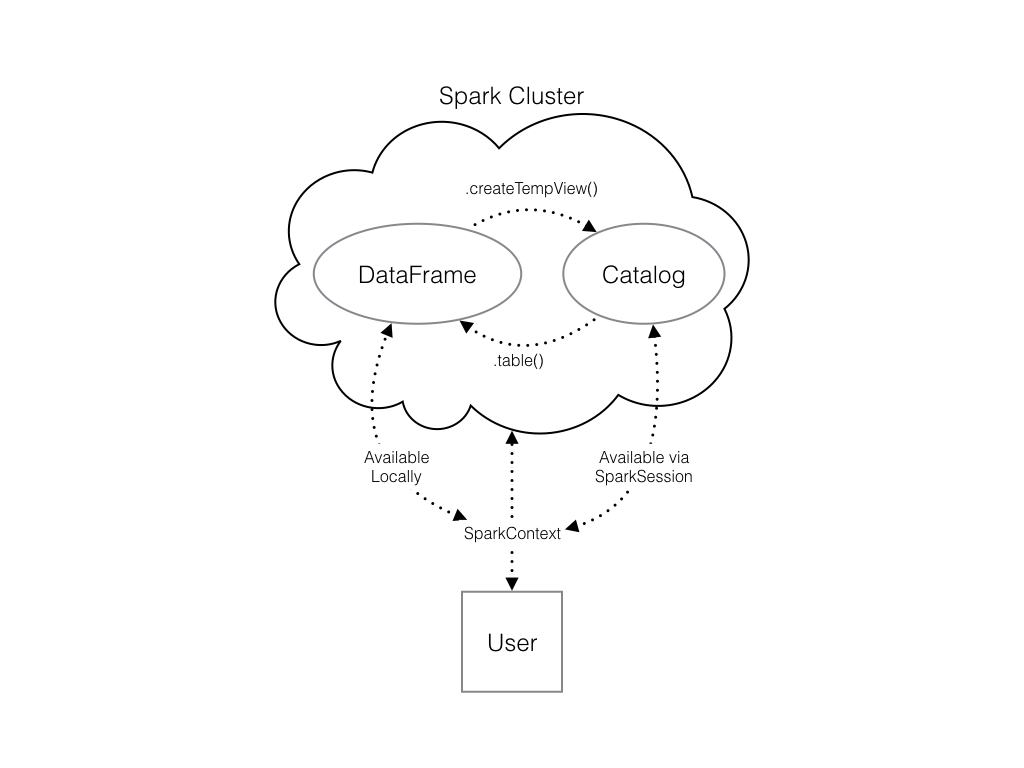

In [89]:
import pandas as pd
import numpy as np

# Create pd_temp
pd_temp = pd.DataFrame(np.random.random(10))

# Create spark_temp from pd_temp
spark_temp = spark.createDataFrame(pd_temp)

# Examine the tables in the catalog
print(spark_temp)

# Add spark_temp to the catalog
spark_temp.createOrReplaceTempView("temp")

# Examine the tables in the catalog again
print(spark.catalog.listTables())

DataFrame[0: double]
[Table(name='airports', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True), Table(name='climate', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True), Table(name='flights', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True), Table(name='planes', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True), Table(name='temp', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]


##Data Ingestion with Spark

While pandas offers powerful tools for local data manipulation and analysis, Spark excels in distributed computing on large-scale datasets. Integrating pandas DataFrames into Spark environments provides the best of both worlds: the flexibility and familiarity of pandas combined with the scalability and distributed computing capabilities of Spark.

Fortunately, Spark provides a convenient solution for reading various data sources directly into Spark DataFrames through the `.read` attribute of the `SparkSession`. This attribute exposes a range of methods tailored for reading different types of data sources, such as CSV files, Parquet files, JSON files, databases, and more. By utilizing these methods, users can effortlessly create Spark DataFrames from diverse data formats, streamlining the data ingestion process.

Consider the scenario where you have a CSV file containing information about airports worldwide. The variable `file_path` holds the path to this file (`airports.csv`). To create a Spark DataFrame from this CSV file, you can leverage the `.read.csv()` method provided by the `.read` attribute of the `SparkSession`. This method reads the CSV file and returns a corresponding Spark DataFrame, enabling seamless integration of external data into Spark.


```python
# define file path
file_path = "/content/airports.csv"

# Read in the airports data
airports = spark.read.csv(file_path, header=True)

# Show the data
airports.show()
```



In [90]:
# define query
query = "FROM airports SELECT * LIMIT 10"

# Get the first 10 rows of flights
airports10 = spark.sql(query)

# Show the results
airports10.show()

+---+--------------------+----------+------------+----+---+---+
|faa|                name|       lat|         lon| alt| tz|dst|
+---+--------------------+----------+------------+----+---+---+
|04G|   Lansdowne Airport|41.1304722| -80.6195833|1044| -5|  A|
|06A|Moton Field Munic...|32.4605722| -85.6800278| 264| -5|  A|
|06C| Schaumburg Regional|41.9893408| -88.1012428| 801| -6|  A|
|06N|     Randall Airport| 41.431912| -74.3915611| 523| -5|  A|
|09J|Jekyll Island Air...|31.0744722| -81.4277778|  11| -4|  A|
|0A9|Elizabethton Muni...|36.3712222| -82.1734167|1593| -4|  A|
|0G6|Williams County A...|41.4673056| -84.5067778| 730| -5|  A|
|0G7|Finger Lakes Regi...|42.8835647| -76.7812318| 492| -5|  A|
|0P2|Shoestring Aviati...|39.7948244| -76.6471914|1000| -5|  U|
|0S9|Jefferson County ...|48.0538086|-122.8106436| 108| -8|  A|
+---+--------------------+----------+------------+----+---+---+



# Chapter 02: Manipulating data in PySpark

##Column Operations in Spark DataFrames

In Spark, performing column-wise operations is facilitated by the `withColumn()` method. This method takes two arguments: the name of the new column as a string and the definition of the new column itself. The new column definition must be an object of class `Column`, which can be created by extracting a column from the DataFrame using the syntax `df.colName`.

One crucial distinction between working with Spark DataFrames and pandas DataFrames is the immutable nature of Spark DataFrames. Unlike pandas, where DataFrames can be modified in place, Spark DataFrames are immutable, meaning they cannot be changed. Consequently, column operations in Spark return a new DataFrame rather than modifying the original one. To overwrite the original DataFrame with the updated columns, users must reassign the returned DataFrame to the original variable, as demonstrated in the following example:

```python
df = df.withColumn("newCol", df.oldCol + 1)
```

In the above code snippet, a new DataFrame is created with an additional column `newCol`, where each entry is equal to the corresponding entry from `oldCol` incremented by one. The original DataFrame `df` is then reassigned to this updated DataFrame.

In addition to adding new columns, the `withColumn()` method can also be used to overwrite existing columns. By passing the name of the column to be overwritten as the first argument, users can update the values of existing columns directly within the DataFrame.

In [91]:
# Create the DataFrame flights
flights = spark.table("flights")

# Show the head
flights.show(5)

# Add duration_hrs
flights = flights.withColumn("duration_hrs", flights.air_time / 60)

# Show the head of updated flights DataFrame
flights.show(5)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+
|2014|   12|  8|     658|       -7|     935|       -5|     VX| N846VA|  1780|   SEA| LAX|     132|     954|   6|    58|
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|
|2014|    3|  9|    1443|       -2|    1652|        2|     VX| N847VA|   755|   SEA| SFO|     111|     679|  14|    43|
|2014|    4|  9|    1705|       45|    1839|       34|     WN| N360SW|   344|   PDX| SJC|      83|     569|  17|     5|
|2014|    3|  9|     754|       -1|    1015|        1|     AS| N612AS|   522|   SEA| BUR|     127|     937|   7|    54|
+----+-----+---+--------+---------+-----

###**<code>Write queries that returns a table of tail numbers and destinations for flights that lasted more than 6 hours?</code>**

In [92]:
# define query
query = "SELECT dest, tailnum FROM flights WHERE air_time > 360"

# Execute the SQL query
long_flights = spark.sql(query)

# Show the result
long_flights.show(5)


+----+-------+
|dest|tailnum|
+----+-------+
| KOA| N508AS|
| OGG| N577AS|
| KOA| N535AS|
| HNL| N592AS|
| KOA| N587AS|
+----+-------+
only showing top 5 rows




###**<code>Write queries that returns the average length of each airline's flights from SEA and from PDX in hours.?</code>**

In [93]:
# define query
query = "SELECT origin, carrier, AVG(air_time) / 60 FROM flights GROUP BY origin, carrier"

# Execute the SQL query
avg_flight_length = spark.sql(query)

# Show the result
avg_flight_length.show(5)

+------+-------+--------------------+
|origin|carrier|(avg(air_time) / 60)|
+------+-------+--------------------+
|   PDX|     US|   2.641062801932367|
|   SEA|     AA|  3.4815763052208837|
|   PDX|     AS|  2.5649012189995797|
|   PDX|     DL|  2.9572755417956658|
|   SEA|     OO|  1.5976558033161805|
+------+-------+--------------------+
only showing top 5 rows



##Data Filtering with Spark

The `.filter()` method in Spark allows users to selectively filter rows from a DataFrame based on specified conditions. It accepts either an expression resembling the WHERE clause of a SQL query as a string or a Spark Column consisting of boolean (True/False) values. This flexibility enables users to apply a wide range of filtering conditions to their datasets, facilitating efficient data extraction and manipulation.

Consider the following two expressions, both of which yield the same output:

```python
flights.filter("air_time > 120").show()
flights.filter(flights.air_time > 120).show()
```

In the first expression, we pass a string `"air_time > 120"` to the `.filter()` method. This string represents the filtering condition, akin to the WHERE clause in SQL. Spark's `.filter()` method accepts any expression that could appear in the WHERE clause of a SQL query, provided it is passed as a string.

In the second expression, we pass `flights.air_time > 120`, which returns a column of boolean values indicating whether each record in the `air_time` column satisfies the condition `air_time > 120`. This column of boolean values is then used as the filtering criterion by the `.filter()` method.

*Key Points:*
- The `.filter()` method in Spark allows for selective data extraction based on specified conditions.
- It can accept filtering conditions as strings or Spark Columns consisting of boolean values.
- Filtering conditions follow the syntax of the WHERE clause in SQL.
- Expressions passed to `.filter()` as strings do not require referencing the table name, similar to SQL queries.
- Using `.filter()` with boolean expressions offers fine-grained control over data filtering and refinement.

In [94]:
# Filter flights by passing a string
long_distance_flights1 = flights.filter("distance > 1000")

# Filter flights by passing a column of boolean values
long_distance_flights2 = flights.filter(flights.distance > 1000)

# Print the data to check they're equal
long_distance_flights1.show(5)
long_distance_flights2.show(5)

+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+-----------------+
|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|dest|air_time|distance|hour|minute|     duration_hrs|
+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+----+--------+--------+----+------+-----------------+
|2014|    1| 22|    1040|        5|    1505|        5|     AS| N559AS|   851|   SEA| HNL|     360|    2677|  10|    40|              6.0|
|2014|    4| 19|    1236|       -4|    1508|       -7|     AS| N309AS|   490|   SEA| SAN|     135|    1050|  12|    36|             2.25|
|2014|   11| 19|    1812|       -3|    2352|       -4|     AS| N564AS|    26|   SEA| ORD|     198|    1721|  18|    12|              3.3|
|2014|    8|  3|    1120|        0|    1415|        2|     AS| N305AS|   656|   SEA| PHX|     154|    1107|  11|    20|2.566666666666667|
|2014|   11| 12|    2346|       -4

## Column Selection with Spark

The `.select()` method in Spark allows users to specify the columns they want to select from a DataFrame. It accepts multiple arguments, with each argument representing a column to be selected. These arguments can be either the column name as a string or a column object, utilizing the `df.colName` syntax. Additionally, when passing column objects, users can perform operations like addition or subtraction on the columns to transform the data contained within them, similar to operations performed inside the `.withColumn()` method.

***Difference between `.select()` and `.withColumn()`:***

- `.select()` returns only the columns specified by the user, allowing for precise column selection.
- `.withColumn()` returns all columns of the DataFrame in addition to the one defined by the user, preserving the original columns while adding the new one.

In data wrangling operations, it's often advantageous to drop unnecessary columns at the outset to avoid carrying around extra data throughout the process. This can improve efficiency and streamline subsequent data manipulation tasks. In such cases, the `.select()` method is preferred over `.withColumn()`, as it allows for focused column selection without retaining unnecessary columns.

In [95]:
# Select the first set of columns
selected1 = flights.select("tailnum", "origin", "dest")

# Select the second set of columns
temp = flights.select(flights.origin, flights.dest, flights.carrier)

# Define first filter
filterA = flights.origin == "SEA"

# Define second filter
filterB = flights.dest == "PDX"

# Filter the data, first by filterA then by filterB
selected2 = temp.filter(filterA).filter(filterB)

# Print the data
selected1.show(5)
selected2.show(5)

+-------+------+----+
|tailnum|origin|dest|
+-------+------+----+
| N846VA|   SEA| LAX|
| N559AS|   SEA| HNL|
| N847VA|   SEA| SFO|
| N360SW|   PDX| SJC|
| N612AS|   SEA| BUR|
+-------+------+----+
only showing top 5 rows

+------+----+-------+
|origin|dest|carrier|
+------+----+-------+
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
|   SEA| PDX|     OO|
+------+----+-------+
only showing top 5 rows



## Advanced Column Operations with Spark

Similar to SQL, the `.select()` method in Spark allows users to perform column-wise operations on DataFrames. When selecting a column using the `df.colName` notation, users can perform any column operation, and the `.select()` method will return the transformed column. For example:

```python
flights.select(flights.air_time/60)
```

This expression returns a column of flight durations in hours instead of minutes. Additionally, users can use the `.alias()` method to rename the column they are selecting. For instance, to select the column `duration_hrs` (which isn't in the DataFrame) and rename it, users can do:

```python
flights.select((flights.air_time/60).alias("duration_hrs"))
```

The equivalent of the `.select()` method in Spark DataFrame is the `.selectExpr()` method, which takes SQL expressions as a string. Users can specify complex computations and rename columns using SQL syntax. For example:

```python
flights.selectExpr("air_time/60 as duration_hrs")
```

In this expression, the SQL `as` keyword is equivalent to the `.alias()` method, allowing users to rename the selected column.

To select multiple columns, users can pass multiple strings to the `.selectExpr()` method, each representing a column or computation. This enables users to perform multiple column operations in a single operation, streamlining the data transformation process.

###**<code>What is the average speed of each flight, considering both outbound and return journeys??</code>**


In [96]:
# Define avg_speed
avg_speed = (flights.distance/(flights.air_time/60)).alias("avg_speed")

# Select the correct columns
speed1 = flights.select("origin", "dest", "tailnum", avg_speed)

# Create the same table using a SQL expression
speed2 = flights.selectExpr("origin", "dest", "tailnum", "distance/(air_time/60) as avg_speed")

# Print the data
speed1.show(5)
speed2.show(5)

+------+----+-------+------------------+
|origin|dest|tailnum|         avg_speed|
+------+----+-------+------------------+
|   SEA| LAX| N846VA| 433.6363636363636|
|   SEA| HNL| N559AS| 446.1666666666667|
|   SEA| SFO| N847VA|367.02702702702703|
|   PDX| SJC| N360SW| 411.3253012048193|
|   SEA| BUR| N612AS| 442.6771653543307|
+------+----+-------+------------------+
only showing top 5 rows

+------+----+-------+------------------+
|origin|dest|tailnum|         avg_speed|
+------+----+-------+------------------+
|   SEA| LAX| N846VA| 433.6363636363636|
|   SEA| HNL| N559AS| 446.1666666666667|
|   SEA| SFO| N847VA|367.02702702702703|
|   PDX| SJC| N360SW| 411.3253012048193|
|   SEA| BUR| N612AS| 442.6771653543307|
+------+----+-------+------------------+
only showing top 5 rows



## Data Aggregation with Spark

GroupedData methods in Spark, such as `.min()`, `.max()`, and `.count()`, are common aggregation functions used to compute summary statistics and perform aggregations on DataFrames. These methods are created by calling the `.groupBy()` DataFrame method, which allows users to group rows of data based on specified columns.

To illustrate, consider the following example where we want to find the minimum value of a column `col` in a DataFrame `df`:

```python
df.groupBy().min("col").show()
```

In this example:
- `.groupBy()` method is called on the DataFrame to create a GroupedData object.
- `.min("col")` method is applied to the GroupedData object to find the minimum value in the column `col`.
- `.show()` method is used to display the result as a DataFrame.

###**<code>What is the shortest distance traveled by a flight departing from Portland International Airport (PDX), and what is the longest duration of a flight departing from Seattle-Tacoma International Airport (SEA)?</code>**


In [97]:
from pyspark.sql.functions import col

# converting air_time coulmn to integer
flights = flights.withColumn("air_time", col("air_time").cast("integer"))

In [98]:
# Find the shortest flight from PDX in terms of distance
flights.filter(flights.origin == "PDX").groupBy().min("distance").show()

# Find the longest flight from SEA in terms of air time
flights.filter(flights.origin == "SEA").groupBy().max("air_time").show()

+-------------+
|min(distance)|
+-------------+
|          106|
+-------------+

+-------------+
|max(air_time)|
+-------------+
|          409|
+-------------+



###**<code>What is the average duration of Delta Airlines flights (DL) departing from Seattle (SEA), and what is the total airborne time for all planes in the dataset?</code>**


In [99]:
# Average duration of Delta flights
flights.filter(flights.carrier == "DL").filter(flights.origin == "SEA").groupBy().avg("air_time").show()

# Total hours in the air
flights.withColumn("duration_hrs", flights.air_time/60).groupBy().sum("duration_hrs").show()

+------------------+
|     avg(air_time)|
+------------------+
|188.20689655172413|
+------------------+

+------------------+
| sum(duration_hrs)|
+------------------+
|25289.600000000126|
+------------------+



###**<code>What is the number of flights for each aircraft tail number (Aircraft registration number), and what is the average duration of flights originating from airports Portland International Airport (PDX) and Seattle-Tacoma International Airport (SEA)?</code>**

In [100]:
# Group by tailnum
by_plane = flights.groupBy("tailnum")

# Number of flights each plane made
by_plane.count().show()

# Group by origin
by_origin = flights.groupBy("origin")

# Average duration of flights from PDX and SEA
by_origin.avg("air_time").show()

+-------+-----+
|tailnum|count|
+-------+-----+
| N442AS|   38|
| N102UW|    2|
| N36472|    4|
| N38451|    4|
| N73283|    4|
| N513UA|    2|
| N954WN|    5|
| N388DA|    3|
| N567AA|    1|
| N516UA|    2|
| N927DN|    1|
| N8322X|    1|
| N466SW|    1|
|  N6700|    1|
| N607AS|   45|
| N622SW|    4|
| N584AS|   31|
| N914WN|    4|
| N654AW|    2|
| N336NW|    1|
+-------+-----+
only showing top 20 rows

+------+------------------+
|origin|     avg(air_time)|
+------+------------------+
|   SEA| 160.4361496051259|
|   PDX|137.11543248288737|
+------+------------------+



###**<code>What is the average departure delay for each destination by month, and find the standard deviation of departure delay?</code>**


In [101]:
# converting dep_delay coulmn to float
flights = flights.withColumn("dep_delay", col("dep_delay").cast("float"))

In [102]:
# Import pyspark.sql.functions as F
import pyspark.sql.functions as F

# Group by month and dest
by_month_dest = flights.groupBy("month","dest")

# Average departure delay by month and destination
by_month_dest.avg("dep_delay").show()

# Standard deviation of departure delay
by_month_dest.agg(F.stddev("dep_delay")).show()

+-----+----+-------------------+
|month|dest|     avg(dep_delay)|
+-----+----+-------------------+
|    4| PHX| 1.6833333333333333|
|    1| RDM|             -1.625|
|    5| ONT| 3.5555555555555554|
|    7| OMA|               -6.5|
|    8| MDW|               7.45|
|    6| DEN|  5.418181818181818|
|    5| IAD|               -4.0|
|   12| COS|               -1.0|
|   11| ANC|  7.529411764705882|
|    5| AUS|              -0.75|
|    5| COS| 11.666666666666666|
|    2| PSP|                0.6|
|    4| ORD|0.14285714285714285|
|   10| DFW| 18.176470588235293|
|   10| DCA|               -1.5|
|    8| JNU|             18.125|
|   11| KOA|               -1.0|
|   10| OMA|-0.6666666666666666|
|    6| ONT|              9.625|
|    3| MSP|                3.2|
+-----+----+-------------------+
only showing top 20 rows

+-----+----+------------------+
|month|dest| stddev(dep_delay)|
+-----+----+------------------+
|    4| PHX|15.003380033491737|
|    1| RDM| 8.830749846821778|
|    5| ONT|18.8951786

##Data Joining in Spark

A join in Spark combines two different tables along a column that they share, known as the key. Examples of keys include columns such as `tailnum` and `carrier` from the `flights` table. When performing a join, Spark matches the values in the key column of both tables and combines the corresponding rows.

Consider a scenario where you want to enrich the `flights` table with additional information about the planes that flew each flight. This information isn't included in the `flights` table because the same plane may fly many different flights over time, resulting in redundant data. To address this, you'd have a separate `planes` table with one row for each unique plane, containing detailed information about each aircraft, including its tail number.

When you join the `flights` table to the `planes` table, you're adding all the columns from the `planes` table to the `flights` table. To populate these columns with information, Spark looks at the tail number from the `flights` table and finds the matching one in the `planes` table. It then uses that matching row from the `planes` table to fill out all the new columns in the merged dataset.

**Understanding the `.join()` Method:**

In PySpark, joins are performed using the DataFrame method `.join()`. This method takes three arguments:
1. The second DataFrame that you want to join with the first one.
2. The `on` argument, which specifies the name of the key column(s) as a string. The names of the key column(s) must be the same in each table.
3. The `how` argument, which specifies the type of join to perform.

The syntax for performing a join using the `.join()` method is as follows:

```python
df1.join(df2, on='key_column', how='leftouter')
```

In [103]:
# First Create the DataFrame airports
airports = spark.table("airports")

# Examine the data
print(airports.show(5))

# Rename the faa column
airports = airports.withColumnRenamed("faa", "dest")

# Join the DataFrames
flights_with_airports = flights.join(airports, on = "dest", how = "leftouter")

# Examine the new DataFrame
print(flights_with_airports.show(5))

+---+--------------------+----------+-----------+----+---+---+
|faa|                name|       lat|        lon| alt| tz|dst|
+---+--------------------+----------+-----------+----+---+---+
|04G|   Lansdowne Airport|41.1304722|-80.6195833|1044| -5|  A|
|06A|Moton Field Munic...|32.4605722|-85.6800278| 264| -5|  A|
|06C| Schaumburg Regional|41.9893408|-88.1012428| 801| -6|  A|
|06N|     Randall Airport| 41.431912|-74.3915611| 523| -5|  A|
|09J|Jekyll Island Air...|31.0744722|-81.4277778|  11| -4|  A|
+---+--------------------+----------+-----------+----+---+---+
only showing top 5 rows

None
+----+----+-----+---+--------+---------+--------+---------+-------+-------+------+------+--------+--------+----+------+------------------+--------------------+---------+-----------+---+---+---+
|dest|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|tailnum|flight|origin|air_time|distance|hour|minute|      duration_hrs|                name|      lat|        lon|alt| tz|dst|
+----+----+----

# Chapter 03: Machine learning pipelines in pySpark

## Machine Learning Pipeline in PySpark: An Overview

At the core of the `pyspark.ml` module lie the Transformer and Estimator classes, which form the foundation of the machine learning pipeline.
- **Transformer Classes:** These classes have a `.transform()` method that takes a DataFrame as input and returns a new DataFrame. Typically, the new DataFrame includes the original data with additional columns appended. For example, the `Bucketizer` class can be used to create discrete bins from a continuous feature, while the `PCA` class can reduce the dimensionality of a dataset using principal component analysis (PCA).
- **Estimator Classes:** On the other hand, Estimator classes implement a `.fit()` method. Similar to Transformer classes, these methods also take a DataFrame as input. However, instead of returning another DataFrame, they return a model object. Examples of such model objects include `StringIndexerModel`, which is used for including categorical data saved as strings in models, and `RandomForestModel`, which utilizes the random forest algorithm for classification or regression tasks.

**The Machine Learning Pipeline:**
The machine learning pipeline in PySpark encompasses several stages, including:
1. **Data Intake:** Acquiring and loading the dataset into a DataFrame.
2. **Data Preparation:** Preprocessing and transforming the data using Transformer classes to prepare it for modeling.
3. **Model Training:** Utilizing Estimator classes to train machine learning models on the transformed dataset.
4. **Model Evaluation:** Assessing the performance of the trained models using appropriate evaluation metrics and techniques.

Here we will build a model that predicts whether or not a flight will be delayed based on the flights data we've been working with. This model will also include information about the plane that flew the route, so the first step is to join the two tables: <code>flights</code> and <code>planes</code>!

In [105]:
# First Create the DataFrame planes
planes = spark.table("planes")

# Examine the data
print(planes.show(5))

# Rename year column
planes = planes.withColumnRenamed("year", "plane_year")

# Join the DataFrames
model_data = flights.join(planes, on="tailnum", how="leftouter")

# Examine the data
print(model_data.show(5))

+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+
|tailnum|year|                type|    manufacturer|   model|engines|seats|speed|   engine|
+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+
| N102UW|1998|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N103US|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N104UW|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N105UW|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
| N107US|1999|Fixed wing multi ...|AIRBUS INDUSTRIE|A320-214|      2|  182|   NA|Turbo-fan|
+-------+----+--------------------+----------------+--------+-------+-----+-----+---------+
only showing top 5 rows

None
+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+------------------+----

## Handling Data Types in PySpark

Before diving into modeling, it's essential to acknowledge that Spark exclusively handles numeric data. This means that all columns in a PySpark DataFrame must be either integers or decimals, known as 'doubles' in Spark terminology. Non-numeric data types, such as strings, must be converted to numeric equivalents to ensure compatibility with Spark's machine learning algorithms.

Upon importing data into PySpark, Spark attempts to infer the data type of each column. However, Spark's inference may not always be accurate, especially when dealing with strings containing numerical values instead of actual numeric values. To address this issue, we can utilize the `.cast()` method in conjunction with the `.withColumn()` method for data type conversion and transformation.


```python
df = df.withColumn("numeric_column", df["string_column"].cast("double"))
```

In [107]:
model_data.printSchema()

root
 |-- tailnum: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- dep_time: string (nullable = true)
 |-- dep_delay: float (nullable = true)
 |-- arr_time: string (nullable = true)
 |-- arr_delay: string (nullable = true)
 |-- carrier: string (nullable = true)
 |-- flight: integer (nullable = true)
 |-- origin: string (nullable = true)
 |-- dest: string (nullable = true)
 |-- air_time: integer (nullable = true)
 |-- distance: integer (nullable = true)
 |-- hour: string (nullable = true)
 |-- minute: string (nullable = true)
 |-- duration_hrs: double (nullable = true)
 |-- plane_year: string (nullable = true)
 |-- type: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- model: string (nullable = true)
 |-- engines: integer (nullable = true)
 |-- seats: integer (nullable = true)
 |-- speed: string (nullable = true)
 |-- engine: string (nullable = true)



In [108]:
# Change column type
model_data = model_data.withColumn("arr_delay", model_data.arr_delay.cast("integer"))\
            .withColumn("air_time", model_data.air_time.cast("integer"))\
            .withColumn("month", model_data.month.cast("integer"))\
            .withColumn("plane_year", model_data.plane_year.cast("integer"))

## Create a new column
<code>plane_year</code> column holds the year each plane was manufactured. However, model will use the planes' age, let's create new column.


In [110]:
# Create the column plane_age
model_data = model_data.withColumn("plane_age", model_data.year - model_data.plane_year)

## Handling Binary Classification: Creating Target Variables

Binary classification involves predicting one of two possible outcomes: yes or no, true or false, positive or negative, etc. In the context of modeling flight delays, the task might involve predicting whether a flight will arrive late or not. This binary outcome simplifies the modeling task and enables the use of classification algorithms to make predictions.

When modeling a yes or no question like "Is the flight late?", the data typically contains attributes related to the event being predicted. In this case, the data may include the arrival delay in minutes for each flight. To create a target variable indicating whether the flight was late or not, we need to derive a boolean column based on the arrival delay data.

```python
from pyspark.sql.functions import when

threshold = 15 # Define threshold value in minutes
df = df.withColumn("is_late", when(df["arrival_delay"] > threshold, True).otherwise(False))
```

In [111]:
# Create is_late
model_data = model_data.withColumn("is_late", model_data.arr_delay > 0)

# Convert to an integer
model_data = model_data.withColumn("label", model_data.is_late.cast("integer"))

# Remove missing values
model_data = model_data.filter("arr_delay is not NULL and dep_delay is not NULL and air_time is not NULL and plane_year is not NULL")


In [113]:
model_data.show(5)

+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+------------------+----------+--------------------+------------+--------+-------+-----+-----+---------+---------+-------+-----+
|tailnum|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|flight|origin|dest|air_time|distance|hour|minute|      duration_hrs|plane_year|                type|manufacturer|   model|engines|seats|speed|   engine|plane_age|is_late|label|
+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+------------------+----------+--------------------+------------+--------+-------+-----+-----+---------+---------+-------+-----+
| N846VA|2014|   12|  8|     658|     -7.0|     935|       -5|     VX|  1780|   SEA| LAX|     132|     954|   6|    58|               2.2|      2011|Fixed wing multi ...|      AIRBUS|A320-214|      2|  182|   NA|Turbo-fan|        3|  false|    0|
| N559AS|201

## Handling Categorical Features

Categorical features represent qualitative data that can take on a limited number of distinct values. Examples include airline names and destination airports, which are typically represented as strings in the dataset. To utilize these features in machine learning models, we need to convert them into numeric representations compatible with Spark's modeling algorithms.

One-hot encoding is a technique used to represent categorical features numerically. It transforms categorical variables into binary vectors, where each element in the vector corresponds to a unique category. In a one-hot vector, only one element is 'hot' (i.e., set to 1), while the rest are 'cold' (i.e., set to 0). This encoding ensures that each category is represented independently, avoiding the implication of ordinality.

**Encoding Process:**
1. **StringIndexer:** The first step involves creating a `StringIndexer`, which maps each unique string value in the categorical column to a numeric index. This index represents the categorical feature in numeric form. The `StringIndexer` acts as an Estimator that generates a mapping and a Transformer that applies this mapping to the DataFrame, resulting in a new numeric column.
2. **OneHotEncoder:** Once the categorical feature is indexed, the next step is to encode it as a one-hot vector using a `OneHotEncoder`. Similar to `StringIndexer`, the `OneHotEncoder` is an Estimator that transforms the indexed numeric column into a one-hot encoded vector representation. The resulting DataFrame contains a column with the one-hot encoded vector for the categorical feature.

```python
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# Create StringIndexer for categorical column
string_indexer = StringIndexer(inputCol="categorical_column", outputCol="indexed_column")

# Create OneHotEncoder for indexed column
encoder = OneHotEncoder(inputCol="indexed_column", outputCol="one_hot_encoded_column")
```

In [115]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# Create a StringIndexer
carr_indexer = StringIndexer(inputCol="carrier", outputCol="carrier_index")
dest_indexer = StringIndexer(inputCol="dest", outputCol="dest_index")

# Create a OneHotEncoder
carr_encoder = OneHotEncoder(inputCol="carrier_index", outputCol="carrier_fact")
dest_encoder = OneHotEncoder(inputCol="dest_index", outputCol="dest_fact")


## Feature Engineering with VectorAssembler

Before proceeding with modeling tasks, it's necessary to consolidate all feature columns into a single column containing a vector representation of the features. This step is crucial because PySpark modeling routines expect the input data to be in this format. By combining feature columns into a vector, each observation is represented as a single vector containing all relevant feature information.

The `VectorAssembler` class, available in the `pyspark.ml.feature` submodule, serves as a Transformer for combining multiple feature columns into a single vector column. It simplifies the process of feature engineering by handling the transformation of data into the required format for modeling routines.

**Feature Combination Process:**
1. **Specify Feature Columns:** Identify the feature columns to be included in the vector assembly process.
2. **Instantiate VectorAssembler:** Create an instance of the VectorAssembler class, specifying the input feature columns and the output vector column.
3. **Transform Data:** Apply the VectorAssembler transformer to the DataFrame, combining the specified feature columns into a single vector column.

```python
from pyspark.ml.feature import VectorAssembler

# Specify feature columns to be combined
feature_columns = ["feature1", "feature2", "feature3"]

# Instantiate VectorAssembler
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
```

In [116]:
from pyspark.ml.feature import VectorAssembler

# Specify feature columns to be combined
feature_columns = ["month", "air_time", "carrier_fact", "dest_fact", "plane_age"]

# Make a VectorAssembler
vec_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

## Streamlining Machine Learning Workflows with PySpark Pipelines

Pipelines in PySpark are instances of the Pipeline class, which resides in the `pyspark.ml` module. A Pipeline encapsulates a sequence of stages, where each stage can be either an Estimator or a Transformer. Estimators are algorithms that learn from data, such as models that need to be trained, while Transformers are algorithms that transform one DataFrame into another, such as feature engineering techniques.

**Benefits of Using Pipelines:**
1. **Simplicity and Consistency:** By combining all necessary components into a single Pipeline object, the modeling process becomes more straightforward and consistent.
2. **Reusability:** Pipelines allow for the reuse of the same modeling process across different datasets or in multiple iterations of model development.
3. **Ease of Maintenance:** Managing and updating the modeling workflow becomes more manageable with Pipelines, as all components are organized within a unified structure.

**Creating a Pipeline:**
To create a Pipeline in PySpark, follow these steps:
1. **Define Stages:** Identify and instantiate the necessary Estimators and Transformers that comprise the modeling workflow.
2. **Instantiate Pipeline:** Create an instance of the Pipeline class, passing the stages as a list or as arguments.
3. **Fit Pipeline:** Apply the Pipeline's `fit()` method to the training data, which triggers the execution of each stage in sequence.
4. **Transform Data:** Once the Pipeline is fitted, use the `transform()` method to apply the learned transformations to new datasets.

```python
from pyspark.ml import Pipeline

# Define stages (Estimators and Transformers)
stages = [string_indexer, encoder, vector_assembler, model]

# Instantiate Pipeline
pipeline = Pipeline(stages=stages)
```

In [117]:
# Import Pipeline
from pyspark.ml import Pipeline

# Define stages
stages=[dest_indexer, dest_encoder, carr_indexer, carr_encoder, vec_assembler]

# Make the pipeline
flights_pipe = Pipeline(stages=stages)

## Data splitting in PySpark:
In PySpark, the data splitting process is typically performed using the <code>randomSplit()</code> method on a DataFrame object. This method splits the data into training and testing sets based on the specified split ratios.

In [118]:
# Fit and transform the data
piped_data = flights_pipe.fit(model_data).transform(model_data)

In [119]:
# Split the data into training and test sets
training, test = piped_data.randomSplit([0.6, 0.4], seed=42)

In [120]:
training.show(5)

+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+------------------+----------+--------------------+----------------+--------+-------+-----+-----+---------+---------+-------+-----+----------+---------------+-------------+--------------+--------------------+
|tailnum|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|flight|origin|dest|air_time|distance|hour|minute|      duration_hrs|plane_year|                type|    manufacturer|   model|engines|seats|speed|   engine|plane_age|is_late|label|dest_index|      dest_fact|carrier_index|  carrier_fact|            features|
+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+------------------+----------+--------------------+----------------+--------+-------+-----+-----+---------+---------+-------+-----+----------+---------------+-------------+--------------+--------------------+
| N102UW|2014|  

In [121]:
test.show(5)

+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+-----------------+----------+--------------------+----------------+--------+-------+-----+-----+---------+---------+-------+-----+----------+---------------+-------------+--------------+--------------------+
|tailnum|year|month|day|dep_time|dep_delay|arr_time|arr_delay|carrier|flight|origin|dest|air_time|distance|hour|minute|     duration_hrs|plane_year|                type|    manufacturer|   model|engines|seats|speed|   engine|plane_age|is_late|label|dest_index|      dest_fact|carrier_index|  carrier_fact|            features|
+-------+----+-----+---+--------+---------+--------+---------+-------+------+------+----+--------+--------+----+------+-----------------+----------+--------------------+----------------+--------+-------+-----+-----+---------+---------+-------+-----+----------+---------------+-------------+--------------+--------------------+
| N102UW|2014|    5

#Chapter 04: Model selection and evaluation

## Logistic Regression in PySpark

Logistic regression is a statistical method used for modeling the probability of a binary outcome based on one or more predictor variables. Despite its name, logistic regression is used for classification rather than regression tasks. It predicts the probability that an instance belongs to a particular class.

**Using Logistic Regression in PySpark:**
1. **Importing LogisticRegression Class:**
   To utilize logistic regression in PySpark, we first need to import the `LogisticRegression` class from the `pyspark.ml.classification` submodule. This class represents the logistic regression estimator.

2. **Instantiating LogisticRegression:**
   Once imported, we can create an instance of logistic regression by calling the `LogisticRegression()` constructor with no arguments. This creates a logistic regression model with default parameters.

```python
from pyspark.ml.classification import LogisticRegression

# Create a LogisticRegression estimator
lr = LogisticRegression()
```

**Benefits of Logistic Regression:**
1. **Interpretability:** Logistic regression models provide interpretable results, allowing for easy understanding of the relationship between predictor variables and the target variable.
2. **Efficiency:** Logistic regression is computationally efficient and can handle large datasets with ease.
3. **Regularization:** PySpark's logistic regression implementation supports regularization techniques to prevent overfitting and improve model generalization.


In [122]:
# Import LogisticRegression
from pyspark.ml.classification import LogisticRegression

# Create a LogisticRegression Estimator
lr = LogisticRegression()

## Model Evaluation with BinaryClassificationEvaluator in PySpark

Model evaluation involves quantifying the performance of a trained model using various metrics. For binary classification tasks, common evaluation metrics include accuracy, precision, recall, F1-score, and area under the receiver operating characteristic curve (ROC AUC).

**Using BinaryClassificationEvaluator:**
1. **Importing BinaryClassificationEvaluator:**
   To evaluate binary classification models in PySpark, we import the `BinaryClassificationEvaluator` class from the `pyspark.ml.evaluation` submodule. This class provides functionality for computing evaluation metrics specific to binary classification, such as the area under the ROC curve (ROC AUC).

2. **Creating BinaryClassificationEvaluator:**
   We instantiate a `BinaryClassificationEvaluator` object by calling the constructor `evals.BinaryClassificationEvaluator()` with the argument `metricName="areaUnderROC"`. This specifies that the evaluator should compute the area under the ROC curve as the evaluation metric.

```python
from pyspark.ml.evaluation import BinaryClassificationEvaluator as evals

# Create a BinaryClassificationEvaluator
evaluator = evals(metricName="areaUnderROC")
```

**Understanding Area Under the ROC Curve (ROC AUC):**

The ROC AUC is a widely used evaluation metric for binary classification models. It quantifies the performance of the model by measuring the area under the receiver operating characteristic (ROC) curve. The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings. A higher ROC AUC score indicates better discrimination between positive and negative classes.

In [124]:
# Import the evaluation submodule
import pyspark.ml.evaluation as evals

# Create a BinaryClassificationEvaluator
evaluator = evals.BinaryClassificationEvaluator(metricName="areaUnderROC")

## Optimizing Model Hyperparameters with ParamGridBuilder in PySpark

Hyperparameters are configuration settings that are external to the model and cannot be learned from the data. Examples include regularization parameters, learning rates, and tree depths. Hyperparameter tuning involves searching for the optimal combination of hyperparameters that maximizes the model's performance on a validation dataset.

**Using ParamGridBuilder:**
1. **Importing ParamGridBuilder:**
   We import the `ParamGridBuilder` class from the `pyspark.ml.tuning` submodule. This class enables us to construct grids of hyperparameters to search over during cross-validation.

2. **Creating Parameter Grid:**
   We instantiate a `ParamGridBuilder` object by calling the constructor `ParamGridBuilder()` with no arguments. This creates an empty parameter grid.

3. **Adding Hyperparameters to the Grid:**
   We use the `.addGrid()` method to add hyperparameters and their corresponding values to the grid. For each hyperparameter, we specify the parameter name (e.g., `lr.regParam` or `lr.elasticNetParam`) and a list of values to try.

4. **Building the Grid:**
   Finally, we call the `.build()` method on the `ParamGridBuilder` object to construct the parameter grid. This returns the grid that will be used during cross-validation.

```python
from pyspark.ml.tuning import ParamGridBuilder as tune

# Create a ParamGridBuilder
grid = tune()

# Add regularization parameter grid
grid = grid.addGrid(lr.regParam, np.arange(0, .1, .01))

# Add elasticNet parameter grid
grid = grid.addGrid(lr.elasticNetParam, [0, 1])

# Build the parameter grid
grid = grid.build()
```

In [125]:
# Import the tuning submodule
import pyspark.ml.tuning as tune

# Create the parameter grid
grid = tune.ParamGridBuilder()

# Add the hyperparameter
grid = grid.addGrid(lr.regParam, np.arange(0, .1, .01))
grid = grid.addGrid(lr.elasticNetParam, [0,1])

# Build the grid
grid = grid.build()

## Cross Validation with CrossValidator in PySpark

The `CrossValidator` is an Estimator class in PySpark designed for performing cross-validation. It automates the process of training and evaluating models on different subsets of the data while tuning hyperparameters. This helps in selecting the best model configuration that generalizes well to unseen data.

**Using CrossValidator:**
1. **Importing CrossValidator:**
   We import the `CrossValidator` class from the `pyspark.ml.tuning` submodule. This class provides functionality for conducting cross-validation on machine learning models.

2. **Creating CrossValidator Instance:**
   We instantiate a `CrossValidator` object by passing the logistic regression Estimator `lr`, the parameter grid created using `ParamGridBuilder`, and the evaluator created previously to compare the models' performance.

3. **Configuring CrossValidator:**
   We configure the `CrossValidator` by specifying the estimator (model), the parameter grid, the evaluator, and other optional parameters such as the number of folds for cross-validation and whether to parallelize the computation.

```python
from pyspark.ml.tuning import CrossValidator as cv

# Create a CrossValidator
validator = cv(estimator=lr,
               estimatorParamMaps=grid,
               evaluator=evaluator,
               numFolds=5)
```

In [127]:
# Create the CrossValidator
cv = tune.CrossValidator(estimator=lr,
               estimatorParamMaps=grid,
               evaluator=evaluator
               )

## Model Fitting and Selection with Cross-Validation

1. **Understanding Cross-Validation:**
   Cross-validation is a technique used to assess the generalization performance of a model by partitioning the dataset into training and validation sets multiple times. It helps in selecting the best model configuration that performs well on unseen data.

2. **Using CrossValidator to Fit Models:**
   In PySpark, we use the `CrossValidator` class to perform cross-validation. The `CrossValidator` takes the estimator (model), parameter grid, evaluator, and other optional parameters as input. It fits the models on the training data and evaluates their performance using the specified metric.

3. **Fitting Cross-Validation Models:**
   We fit the cross-validation models by calling the `.fit()` method on the `CrossValidator` object and passing the training data. This step trains multiple models with different hyperparameter configurations and evaluates them using cross-validation.

```python
from pyspark.ml.tuning import CrossValidator as cv

# Create a CrossValidator
validator = cv(estimator=lr,
               estimatorParamMaps=grid,
               evaluator=evaluator,
               numFolds=5)

# Fit cross-validation models
models = validator.fit(training)

# Extract the best model
best_lr = models.bestModel
```

In [128]:
# Call lr.fit()
best_lr = lr.fit(training)

# Print best_lr
print(best_lr)

LogisticRegressionModel: uid=LogisticRegression_b375f160d6aa, numClasses=2, numFeatures=81


## Evaluate the model

In [129]:
# Use the model to predict the test set
test_results = best_lr.transform(test)

# Evaluate the predictions
print(evaluator.evaluate(test_results))

0.6877349821449119
